<a href="https://colab.research.google.com/github/t-sopronyuk/402_422/blob/main/PPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving subxPrices.csv to subxPrices.csv


In [ ]:
import io
sbux_df = pd.read_csv(io.BytesIO(uploaded['subxPrices.csv'])) #get input data

In [ ]:
#sbux_df = pd.read_csv('subxPrices.csv') #get input data

In [ ]:
sbux_df.head() #show 5 first rows from data frame

,Date,Adj Close
0,1998-3-1,2.328581
1,1998-4-1,2.473114
2,1998-5-1,2.466691
3,1998-6-1,2.746120
4,1998-7-1,2.151930


In [ ]:
sbux_df.tail() #show 5 last rows from data frame


,Date,Adj Close
176,2012-11-1,22.174643
177,2012-12-1,23.022438
178,2013-1-1,24.091366
179,2013-2-1,23.546167
180,2013-3-1,24.539543


In [ ]:
# setting 'Date' as index column (row labels)
sbuxPrices_df = sbux_df.set_index('Date') 

In [ ]:
sbux_df.columns # return the column labels

Index(['Date', 'Adj Close'], dtype='object')

In [ ]:
sbuxPrices_df.head() #show 5 first rows from data frame

,Adj Close
Date,
1998-3-1,2.328581
1998-4-1,2.473114
1998-5-1,2.466691
1998-6-1,2.746120
1998-7-1,2.151930


In [ ]:
sbux_df.iloc[100:132] # return range of the rows from 100 to 132

,Date,Adj Close
100,2006-7-1,14.072468
101,2006-8-1,12.748675
102,2006-9-1,13.998466
103,2006-10-1,15.519595
104,2006-11-1,14.508252
105,2006-12-1,14.561693
106,2007-1-1,14.364358
107,2007-2-1,12.703454
108,2007-3-1,12.892565
109,2007-4-1,12.752788


In [ ]:
sbux_df['Date'] = pd.to_datetime(sbux_df['Date']) #convert type of the "Date" column to datetime

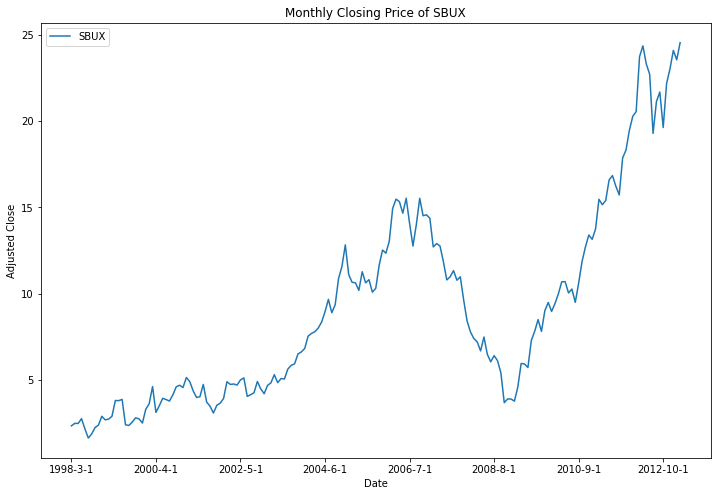

In [ ]:
#Plot the 'Adj Close' data
sbuxPrices_df['Adj Close'].plot(label='SBUX',figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.legend()
plt.title("Monthly Closing Price of SBUX")
plt.show()

           Adj Close  Simple Return (method 1)  Simple Return (method 2)
Date                                                                    
1998-3-1    2.328581                       NaN                       NaN
1998-4-1    2.473114                  0.062069                  0.062069
1998-5-1    2.466691                 -0.002597                 -0.002597
1998-6-1    2.746120                  0.113281                  0.113281
1998-7-1    2.151930                 -0.216374                 -0.216374
...              ...                       ...                       ...
2012-11-1  22.174643                  0.130065                  0.130065
2012-12-1  23.022438                  0.038233                  0.038233
2013-1-1   24.091366                  0.046430                  0.046430
2013-2-1   23.546167                 -0.022630                 -0.022630
2013-3-1   24.539543                  0.042188                  0.042188

[181 rows x 3 columns]


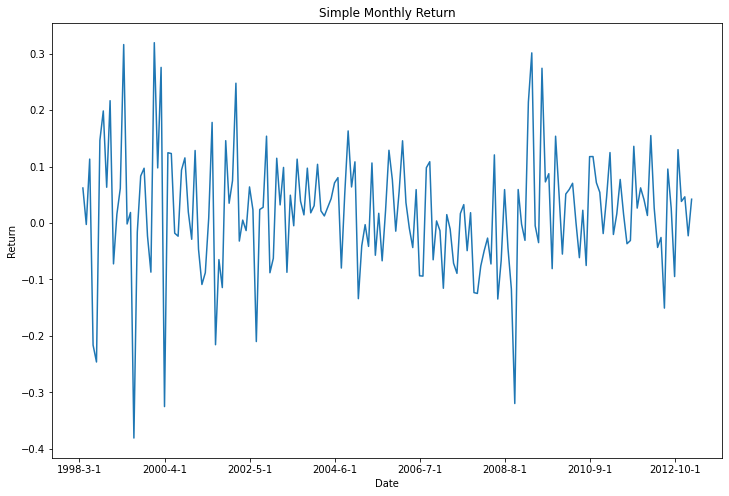

In [ ]:
#Simple monthly Return
sbuxPrices_df['Simple Return (method 1)']= sbuxPrices_df['Adj Close'].pct_change()
sbuxPrices_df['Simple Return (method 2)']= sbuxPrices_df['Adj Close'] / sbuxPrices_df['Adj Close'].shift(1) - 1
print(sbuxPrices_df)


sbuxPrices_df['Simple Return (method 1)'].plot(figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Simple Monthly Return")
plt.show()

Date
1998-3-1          NaN
1998-4-1     0.060219
1998-5-1    -0.002601
1998-6-1     0.107311
1998-7-1    -0.243824
               ...   
2012-11-1    0.122276
2012-12-1    0.037520
2013-1-1     0.045384
2013-2-1    -0.022890
2013-3-1     0.041323
Name: Continuously Return, Length: 181, dtype: float64


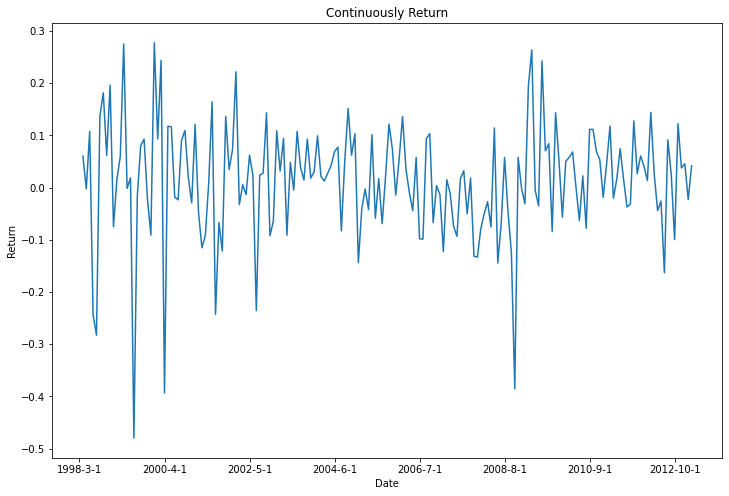

In [ ]:
#Logarithmic Return / Continuously Compounded Return
#Using shift(1), we can get the row just above the present row. 
#log()  calculates the natural log of the value given inside it.
sbuxPrices_df['Continuously Return'] = np.log(sbuxPrices_df['Adj Close']/sbuxPrices_df['Adj Close'].shift(1))


print(sbuxPrices_df['Continuously Return']) 
sbuxPrices_df['Continuously Return'].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Continuously Return")
plt.show()

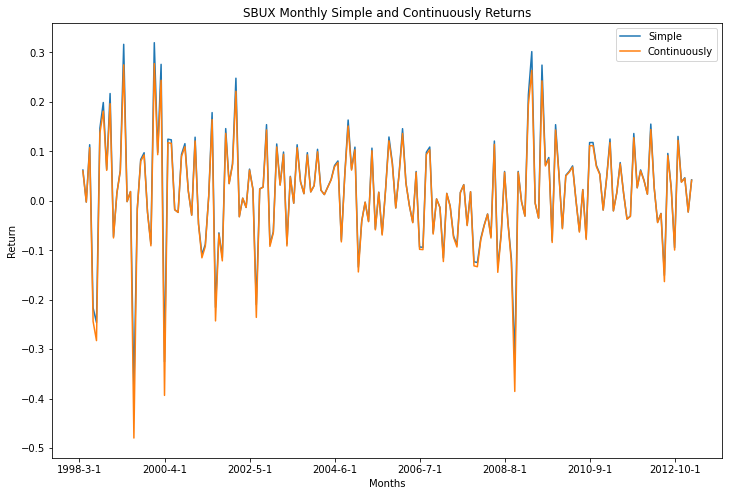

In [ ]:
sbuxPrices_df['Simple Return (method 1)'].plot(figsize=(12,8), label="Simple")
sbuxPrices_df['Continuously Return'].plot(label="Continuously")

plt.xlabel("Months" )

plt.ylabel("Return")
plt.legend()
plt.title("SBUX Monthly Simple and Continuously Returns")
plt.show()